# STEP1 : Problem Identification

## Genetic Disorder Prediction:

As per reports, because of the unsustainable increase in population and a lack of access to adequate health care, food, and shelter, the number of genetic disorder ailments have increased. 
Hereditary illnesses are becoming more common due to a lack of understanding about the need for genetic testing. 
Often kids die because of these illnesses, thus genetic testing during pregnancy is critical.


## Context

•	Since the dawn of human life on the face of the earth, the global population has been booming. The population was estimated to be 1 billion people in the year 1800. The figure had increased to a new high of 6 billion humans by the turn of the twentieth century. Day in and day out, 227,000 people are being added to the world; it is projected that by the end of the 21st century, the world's population may exceed 11 billion.

•	As per reports, because of the unsustainable increase in population and a lack of access to adequate health care, food, and shelter, the number of genetic disorder ailments have increased. Hereditary illnesses are becoming more common due to a lack of understanding about the need for genetic testing. Often kids die because of these illnesses, thus genetic testing during pregnancy is critical.


## Column Definitions:

•	Genes in mother's side:
Represent a gene defect in a patient's mother

•	Inherited from father:
Represent a gene defect in a patient's father

•	Paternal gene:
Represent a gene defect in a patient's paternal side of the family

•	Respiratory Rate(breaths/min):
Represents a patient's respiratory breathing rate

•	Heart Rate (rates/min):
Represents a patient's heart rate

•	Parental Consent:
Represents whether a patient's parents approved the treatment plan

•	Follow-up:
Represents a patient's level of risk (how intense their condition is)

•	Folic acid details (peri-conceptional):
Represents the periconceptional folic acid supplementation details of a patient

•	H/O serious maternal illness:
Represents an unexpected outcome of labor and delivery that resulted in significant short or long term consequences to a patient's mother

•	H/O radiation exposure (x-ray):
Represents whether a patient has any radiation exposure history

•	H/O substance abuse:
Represents whether a parent has a history of drug addiction

•	Assisted conception:
Represents the type of treatment used for infertility

•	Birth defects:
Represents whether a patient has birth defects


TARGET
•	Genetic Disorder
•	Disorder Subclass


# STEP2 : Data Wrangling

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file = '../data/train.csv'
df = pd.read_csv(file)
print(df.head(2))

  Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre  ...            NaN   
1         NaN        Brycen  ...       Multiple   

   White Blood cell count (thousand per microliter) Blood test result  \
0                                          9.857562               NaN   
1                                          5.522560            normal   

  Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  \
0       1.0       1.0       1.0       1.0        1.0   
1       1.0       NaN       1.0       1.0        0.0   

     

In [5]:
print(df.shape)

(22083, 45)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [7]:
df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

We will drop the columns that are not very useful for our prediction

In [8]:
df.drop(columns=["Patient Id","Patient First Name","Family Name","Father's name","Institute Name","Location of Institute", 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5','Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'], inplace=True, axis=1)

In [9]:
df.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

Check Unique values for each column to find out if there are values which represent nan or incorrect values. 
e.g values like "-" will be replaced with nan for data uniformity

In [10]:
for col in df:
    print(col,":", df[col].unique())

Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]
Genes in mother's side : ['Yes' 'No']
Inherited from father : ['No' 'Yes' nan]
Maternal gene : ['Yes' 'No' nan]
Paternal gene : ['No' 'Yes']
Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
Mother's age : [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
Father's age : [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 37. 36. 33. 46. 40. 45.]
Status : ['Alive' 'Deceased']
Respiratory Rate (breaths/min) : ['Normal (30-60)' 'Tachypnea' nan]
Heart Rate (rates/min : ['Normal' 'Tachycardia' nan]
Parental consent : ['Yes' nan]
Follow-up : ['High' 'Low' nan]
Gender : [nan 'Male' 'Female' 'Ambiguous']
Birth asphyxia : [nan 'No' 'No record' 'Not available' 'Yes']
Aut

In [11]:
df['Autopsy shows birth defect (if applicable)'].value_counts()

Not applicable    11083
Yes                3383
None               3366
No                 3225
Name: Autopsy shows birth defect (if applicable), dtype: int64

As we see columns like 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'H/O radiation exposure (x-ray)''H/O substance abuse' has values like 'Not applicable', 'None', '-', 'No Record' which can be replaced with Nan.

In [12]:
#df.isna().sum()
df['Birth asphyxia'] = df['Birth asphyxia'].replace("Not available", np.NaN)
df['Birth asphyxia'] = df['Birth asphyxia'].replace("No record", np.NaN)
df['Autopsy shows birth defect (if applicable)'] = df['Autopsy shows birth defect (if applicable)'].replace("Not applicable", np.NaN)
df['Gender'] = df['Gender'].replace("Ambiguous", np.NaN)
#check with dipanjan on this : yes we can replcae None with no
df['Autopsy shows birth defect (if applicable)'] = df['Autopsy shows birth defect (if applicable)'].replace("None", 'No')
df['H/O radiation exposure (x-ray)'] = df['H/O radiation exposure (x-ray)'].replace("Not applicable", np.NaN)
df['H/O radiation exposure (x-ray)'] = df['H/O radiation exposure (x-ray)'].replace("-", np.NaN)
df['H/O substance abuse'] = df['H/O substance abuse'].replace("Not applicable", np.NaN)
df['H/O substance abuse'] = df['H/O substance abuse'].replace("-", np.NaN)

In [13]:
for col in df:
    print(col,":", df[col].unique())

Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]
Genes in mother's side : ['Yes' 'No']
Inherited from father : ['No' 'Yes' nan]
Maternal gene : ['Yes' 'No' nan]
Paternal gene : ['No' 'Yes']
Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
Mother's age : [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
Father's age : [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 37. 36. 33. 46. 40. 45.]
Status : ['Alive' 'Deceased']
Respiratory Rate (breaths/min) : ['Normal (30-60)' 'Tachypnea' nan]
Heart Rate (rates/min : ['Normal' 'Tachycardia' nan]
Parental consent : ['Yes' nan]
Follow-up : ['High' 'Low' nan]
Gender : [nan 'Male' 'Female']
Birth asphyxia : [nan 'No' 'Yes']
Autopsy shows birth defect (if applicable) 

Rename Columns for siplicity

In [14]:
df.rename(columns={"Patient Age":"Patient_Age",
                   "Inherited from father" : "Inherited_Father",
                    "Maternal gene" : "Maternal_Gene",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_count_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Parental consent":"Parental_Consent",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Birth_Place",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"Anomalies_History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"WBC_Count",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass"},inplace=True)

In [15]:
df.head()

,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_count_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Radiation_Exposure,Substance_Abuse,Assisted_Conception,Anomalies_History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,WBC_Count,Blood_Test_Result,Genetic_Disorder,Disorder_Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,No,No,No,Yes,NaN,NaN,9.857562,NaN,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,Deceased,Tachypnea,...,NaN,NaN,No,Yes,NaN,Multiple,5.522560,normal,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,NaN,NaN,NaN,Yes,1.0,Singular,7.919321,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,NaN,NaN,Yes,No,4.0,Multiple,4.098210,NaN,Multifactorial genetic inheritance disorders,Cancer


In [16]:
df.shape

(22083, 29)

Let's identify How many NA values we have.

In [17]:
df.isnull().values.any()

True

In [18]:
df.isna().sum()

Patient_Age                                1427
Genes_Mother_Side                             0
Inherited_Father                            306
Maternal_Gene                              2810
Paternal_Gene                                 0
Blood_Cell_count_mcL                          0
Mother_Age                                 6036
Father_Age                                 5986
Status                                        0
Respiratory_Rate_Breaths_Min               2149
Heart_Rates_Min                            2113
Parental_Consent                           2125
Follow_Up                                  2166
Gender                                     8868
Birth_Asphyxia                            12133
Autopsy_Birth_Defect                      12109
Birth_Place                                2124
Folic_Acid                                 2117
Maternal_Illness                           2152
Radiation_Exposure                        12098
Substance_Abuse                         

1. As seen above, df has may records with null data for Birth_Asphyxia(12133), Autopsy_Birth_Defect(12109), Radiation_Exposure(12098), Substance_Abuse(12075) and other columns 

- We will fill missing values with 'missing' for string columns 
- We will fill missing values with mean value for numeric columns

2. The Target variables Genetic_Disorder, Disorder_Subclass, have many rows with null values. We will drop these as they are of not any use.

Replacing Nan values with appropriate values

In [19]:
# Replacing Numerical column Values having Nulls
df["Patient_Age"].fillna(round(df["Patient_Age"].mean(), 2),inplace=True)
df["Mother_Age"].fillna(round(df["Mother_Age"].mean(), 2),inplace=True)
df["Father_Age"].fillna(round(df["Father_Age"].mean(), 2),inplace=True)
df["Previous_Abortion"].fillna(round(df["Previous_Abortion"].mean(), 2),inplace=True)
df["WBC_Count"].fillna(round(df["WBC_Count"].mean(), 2),inplace=True)

# Replacing Categorical columns values having Nulls
df["Inherited_Father"].fillna(str('missing'),inplace=True)
df["Maternal_Gene"].fillna(str('missing'),inplace=True)
df["Respiratory_Rate_Breaths_Min"].fillna(str('missing'),inplace=True)
df["Heart_Rates_Min"].fillna(str('missing'),inplace=True)
df["Parental_Consent"].fillna(str('missing'),inplace=True)
df["Follow_Up"].fillna(str('missing'),inplace=True)
df["Gender"].fillna(str('missing'),inplace=True)
df["Birth_Asphyxia"].fillna(str('missing'),inplace=True)
df["Autopsy_Birth_Defect"].fillna(str('missing'),inplace=True)
df["Birth_Place"].fillna(str('missing'),inplace=True)
df["Folic_Acid"].fillna(str('missing'),inplace=True)
df["Maternal_Illness"].fillna(str('missing'),inplace=True)
df["Radiation_Exposure"].fillna(str('missing'),inplace=True)
df["Substance_Abuse"].fillna(str('missing'),inplace=True)
df["Assisted_Conception"].fillna(str('missing'),inplace=True)
df["Anomalies_History_Previous_Pregnancies"].fillna(str('missing'),inplace=True)
df["Birth_Defects"].fillna(str('missing'),inplace=True)
df["Blood_Test_Result"].fillna(str('missing'),inplace=True)

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()

Patient_Age                               0
Genes_Mother_Side                         0
Inherited_Father                          0
Maternal_Gene                             0
Paternal_Gene                             0
Blood_Cell_count_mcL                      0
Mother_Age                                0
Father_Age                                0
Status                                    0
Respiratory_Rate_Breaths_Min              0
Heart_Rates_Min                           0
Parental_Consent                          0
Follow_Up                                 0
Gender                                    0
Birth_Asphyxia                            0
Autopsy_Birth_Defect                      0
Birth_Place                               0
Folic_Acid                                0
Maternal_Illness                          0
Radiation_Exposure                        0
Substance_Abuse                           0
Assisted_Conception                       0
Anomalies_History_Previous_Pregn

In [22]:
#df.drop(columns=['Disorder_Subclass'], inplace=True, axis=1)

In [23]:
# old shape (22083, 29)
df.shape

(18047, 29)

In [24]:
for c in df.columns:
    print (df[c].value_counts())
    print('----------------------------------')

4.00     1170
5.00     1168
9.00     1166
12.00    1156
2.00     1152
0.00     1152
3.00     1140
7.00     1133
6.00     1127
13.00    1125
1.00     1124
8.00     1109
14.00    1094
11.00    1089
10.00    1082
6.97     1060
Name: Patient_Age, dtype: int64
----------------------------------
Yes    10743
No      7304
Name: Genes_Mother_Side, dtype: int64
----------------------------------
No         10773
Yes         7054
missing      220
Name: Inherited_Father, dtype: int64
----------------------------------
Yes        8803
No         7173
missing    2071
Name: Maternal_Gene, dtype: int64
----------------------------------
No     10239
Yes     7808
Name: Paternal_Gene, dtype: int64
----------------------------------
4.760603    1
5.006081    1
5.014455    1
4.751267    1
4.506074    1
           ..
4.523190    1
4.693834    1
5.208621    1
4.838423    1
4.738067    1
Name: Blood_Cell_count_mcL, Length: 18047, dtype: int64
----------------------------------
34.53    4457
23.00     449
48

Checking if any rows are duplicated. if yes, then we need to drop them.

In [25]:
df_dup = df.duplicated()
print(df_dup.sum())

0


# STEP3 : EDA-Exploratory Data Analysis

Visualizing categorical data

In [26]:
#select categorical variables only
df["Genetic_Disorder"].value_counts()

Mitochondrial genetic inheritance disorders     9241
Single-gene inheritance diseases                6929
Multifactorial genetic inheritance disorders    1877
Name: Genetic_Disorder, dtype: int64

Our target variable is Categorical string field. Lets plot to check the relationship with other variables. 

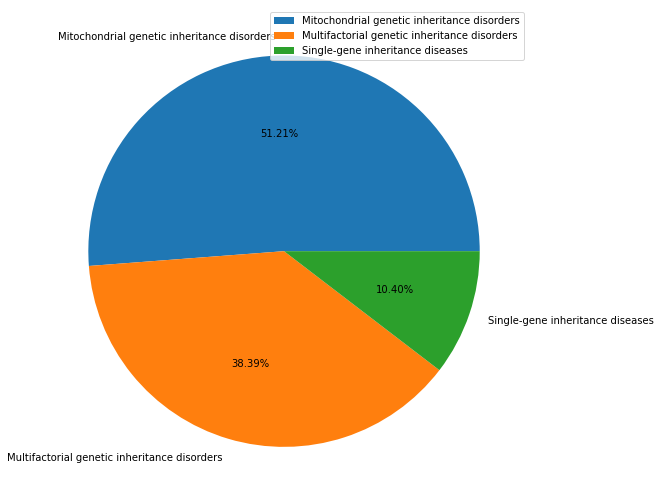

In [27]:
GD_labels = df['Genetic_Disorder'].unique()
GD_values = df['Genetic_Disorder'].value_counts()
plt.figure(figsize=(9,9))
#df['Genetic_Disorder'].value_counts().plot(kind='pie')
plt.pie(GD_values, labels=GD_labels, autopct='%1.2f%%')
plt.legend(loc = 'upper right')

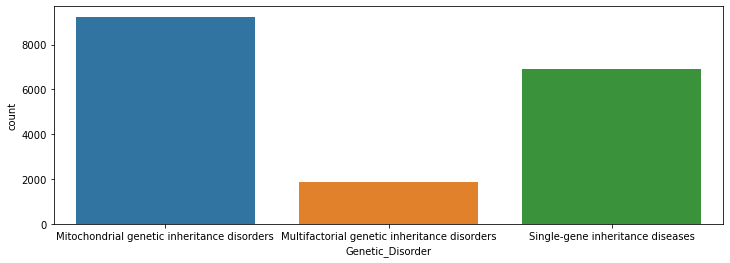

In [28]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'Genetic_Disorder', data = df);

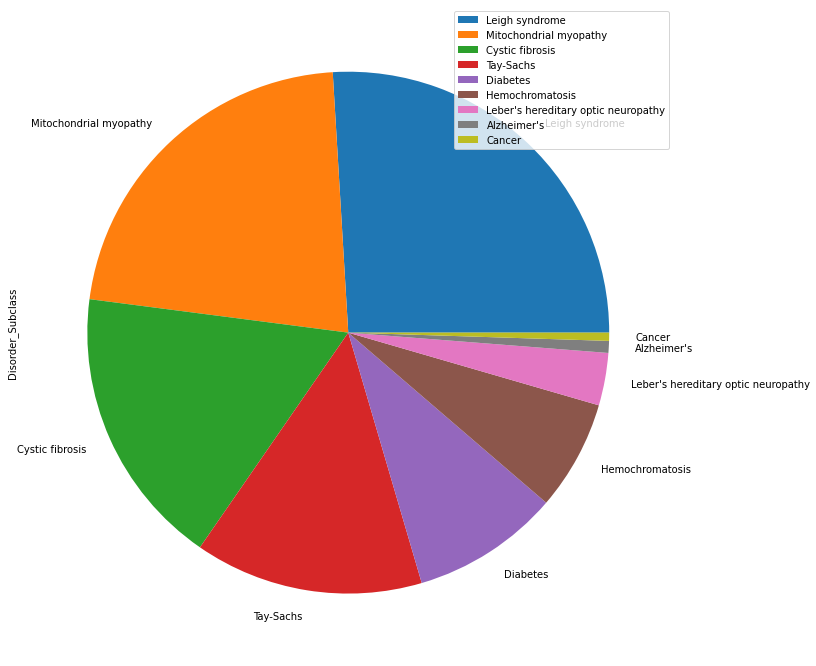

In [29]:
plt.figure(figsize=(12, 12))
df['Disorder_Subclass'].value_counts().plot(kind='pie')
plt.legend(loc = 'upper right')

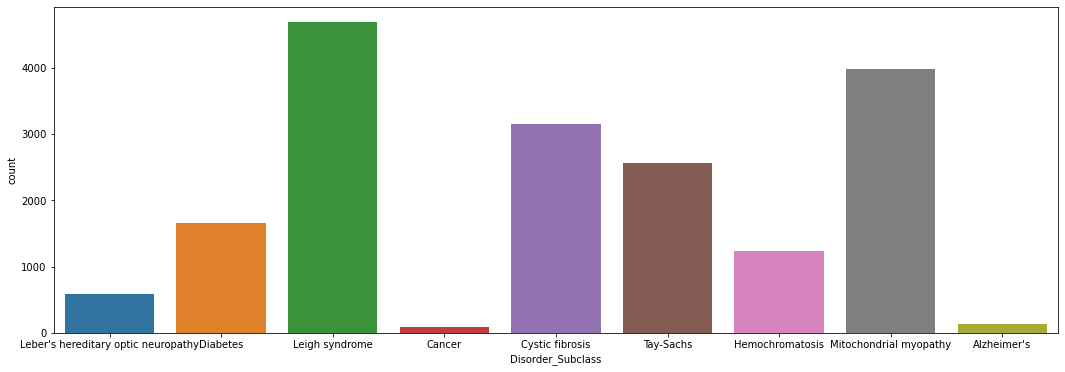

In [30]:
plt.figure(figsize=(18, 6))
sns.countplot(x = 'Disorder_Subclass', data = df);

Histograms for each Numeric variable in df

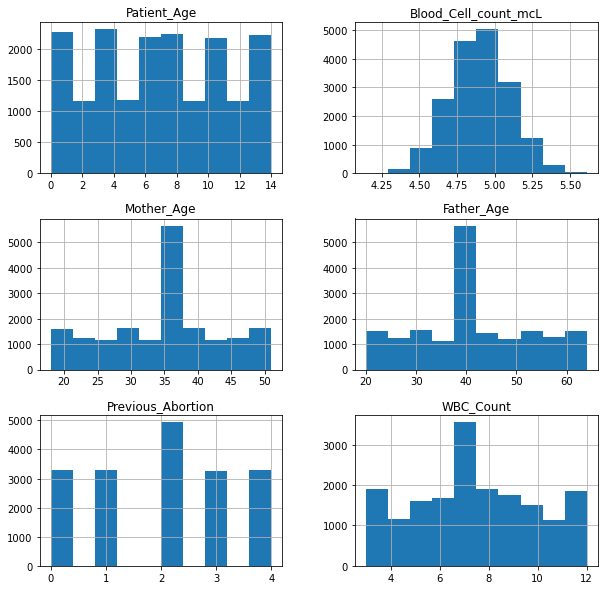

In [31]:
#histograms for each variable in df
hist = df.hist(bins=10,figsize =(10,10))

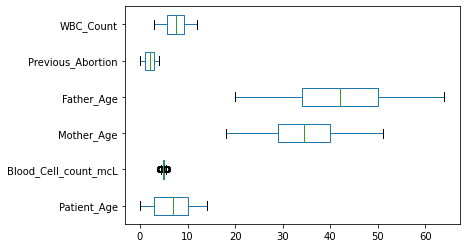

In [32]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=10)

For Plotting relation between Categorical vs Categorical variables, Use Bar Chart or count plot.

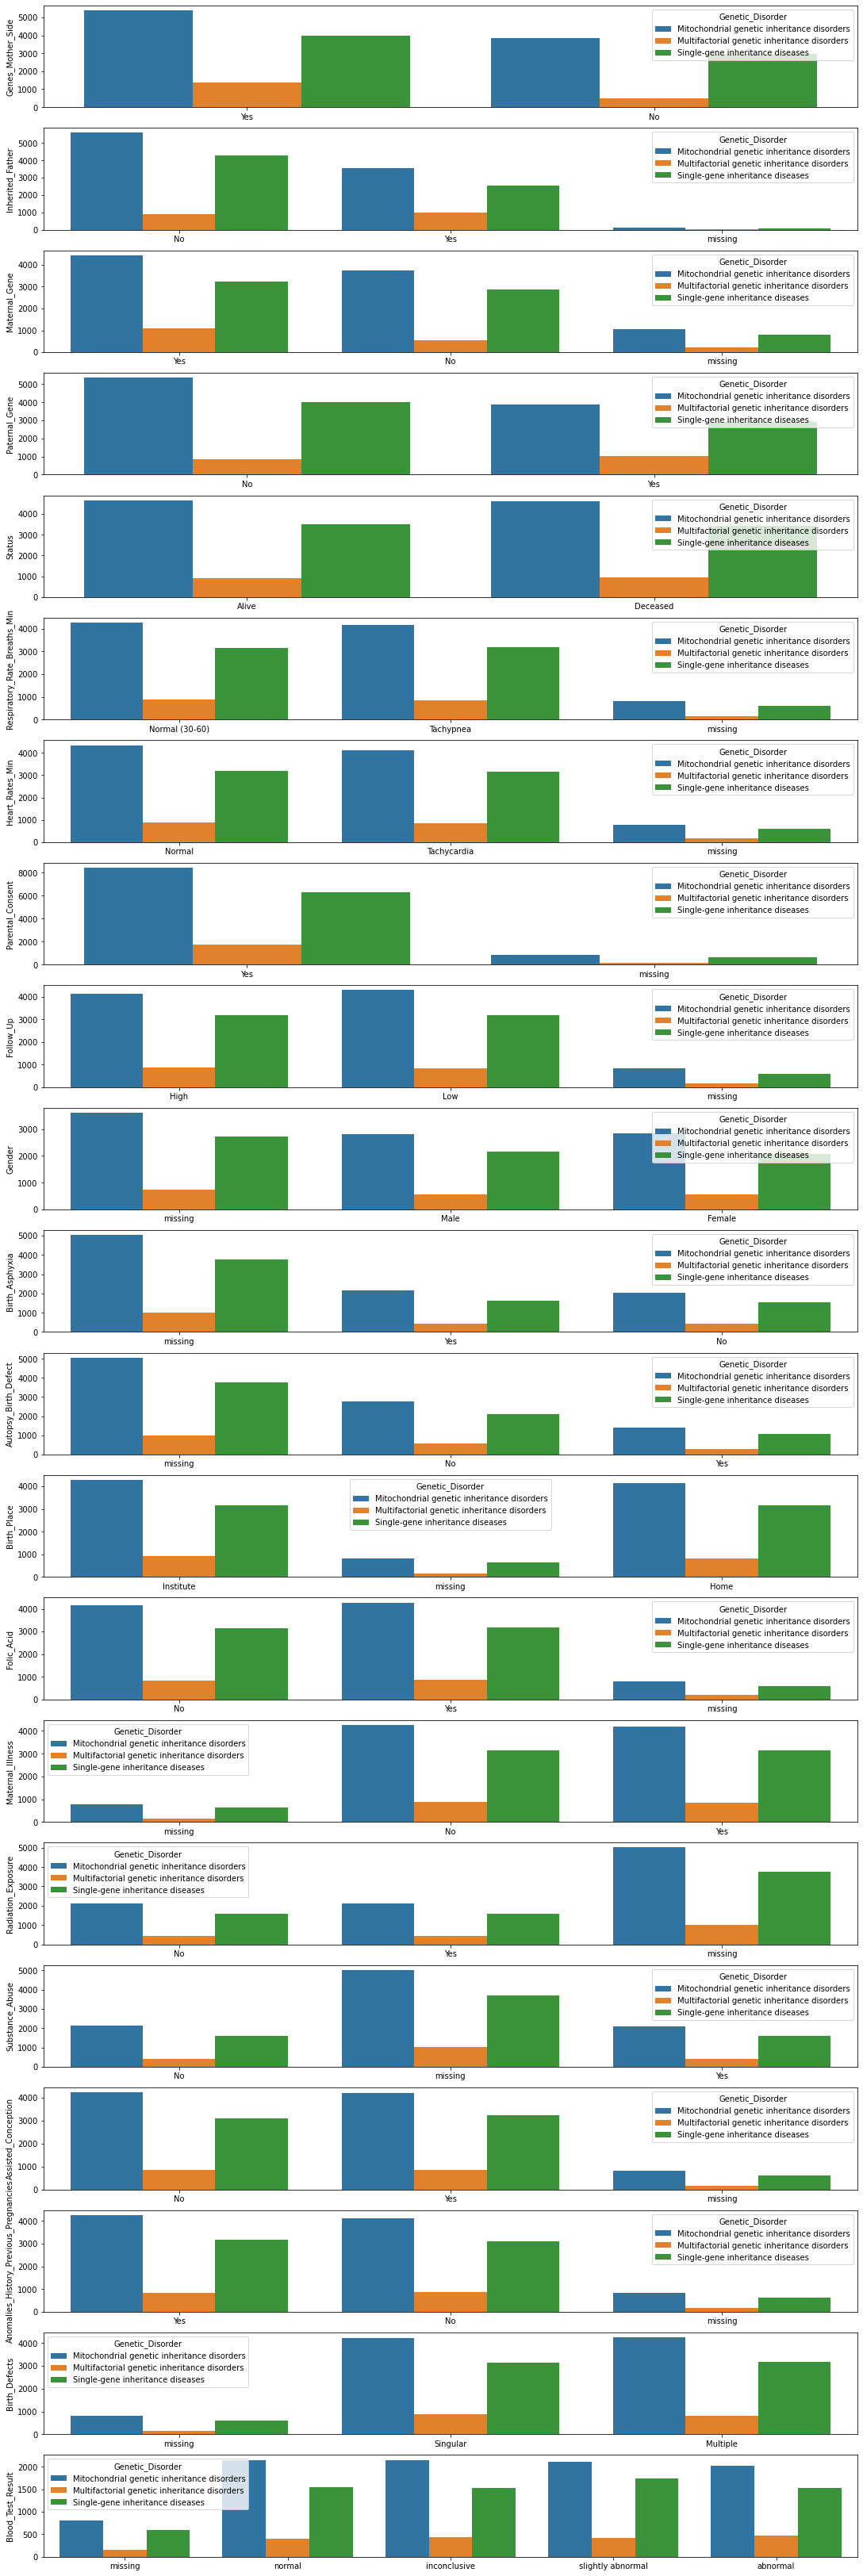

In [33]:
cat_cols=['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'Anomalies_History_Previous_Pregnancies',
       'Birth_Defects', 'Blood_Test_Result']

fig, ax = plt.subplots(len(cat_cols),  figsize = (15, 45), constrained_layout = True)

for i, var in enumerate(cat_cols): 
    sns.countplot(data = df, x = var, hue = 'Genetic_Disorder', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

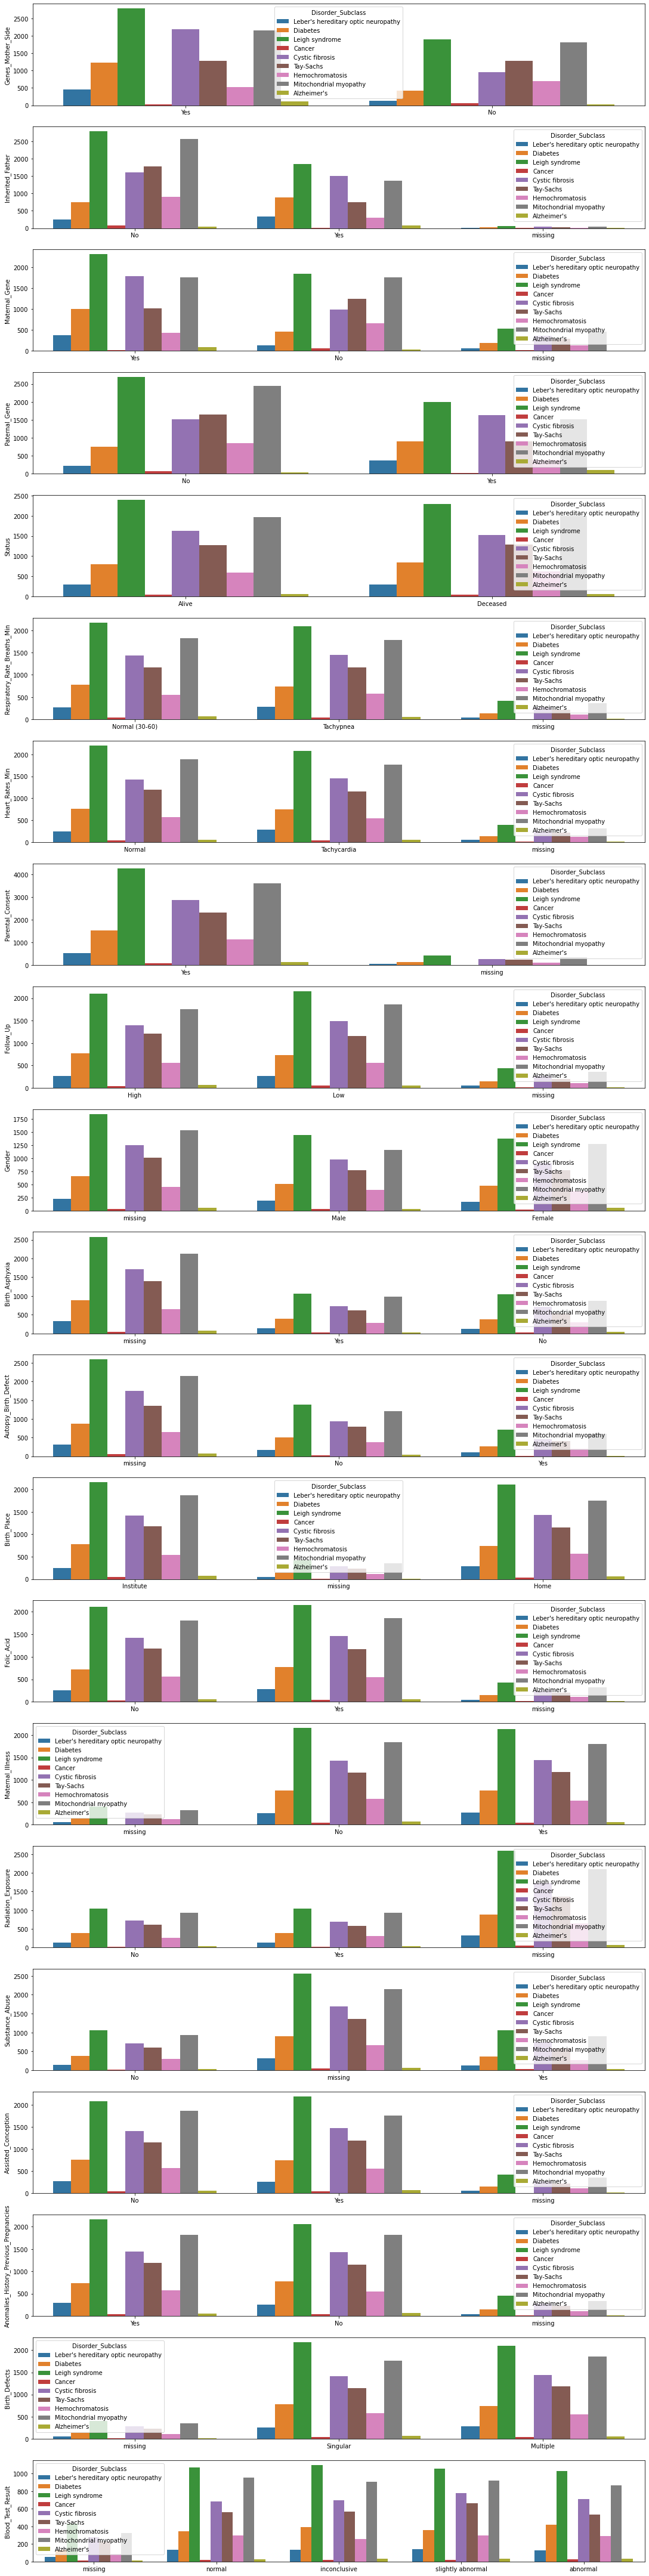

In [34]:
cat_cols=['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'Anomalies_History_Previous_Pregnancies',
       'Birth_Defects', 'Blood_Test_Result']

fig, ax = plt.subplots(len(cat_cols),  figsize = (15, 60), constrained_layout = True)

for i, var in enumerate(cat_cols): 
    sns.countplot(data = df, x = var, hue = 'Disorder_Subclass', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

<AxesSubplot:xlabel='Genetic_Disorder', ylabel='Patient_Age'>

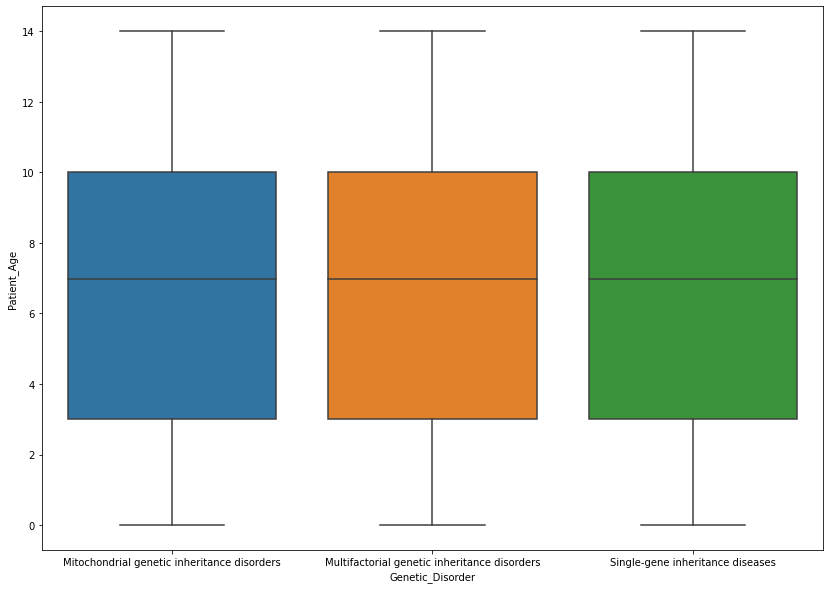

In [35]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='Genetic_Disorder', y='Patient_Age', data=df)

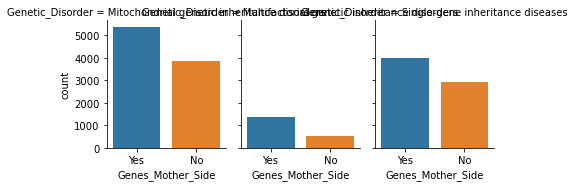

In [36]:
#count plot for one variable
#print(df.columns)
#sns.countplot(data = df, x = df_cat['Genes_Mother_Side'])

sns.catplot(x="Genes_Mother_Side", col="Genetic_Disorder", col_wrap=4,
                data=df,
                kind="count", height=2.5, aspect=.8)

In [37]:
df.isna().sum()

Patient_Age                               0
Genes_Mother_Side                         0
Inherited_Father                          0
Maternal_Gene                             0
Paternal_Gene                             0
Blood_Cell_count_mcL                      0
Mother_Age                                0
Father_Age                                0
Status                                    0
Respiratory_Rate_Breaths_Min              0
Heart_Rates_Min                           0
Parental_Consent                          0
Follow_Up                                 0
Gender                                    0
Birth_Asphyxia                            0
Autopsy_Birth_Defect                      0
Birth_Place                               0
Folic_Acid                                0
Maternal_Illness                          0
Radiation_Exposure                        0
Substance_Abuse                           0
Assisted_Conception                       0
Anomalies_History_Previous_Pregn

In [38]:
df.columns

Index(['Patient_Age', 'Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Blood_Cell_count_mcL', 'Mother_Age', 'Father_Age',
       'Status', 'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min',
       'Parental_Consent', 'Follow_Up', 'Gender', 'Birth_Asphyxia',
       'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid', 'Maternal_Illness',
       'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception',
       'Anomalies_History_Previous_Pregnancies', 'Previous_Abortion',
       'Birth_Defects', 'WBC_Count', 'Blood_Test_Result', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

In [40]:
from pathlib import Path  
filepath = Path('../data/train_clean.csv') 
df.to_csv(filepath, index=False)  

# Step 3 : Pre-Processing

In [41]:
filepath = Path('../data/train_clean.csv') 
clean_data = pd.read_csv(filepath)
clean_data.head()

,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_count_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Radiation_Exposure,Substance_Abuse,Assisted_Conception,Anomalies_History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,WBC_Count,Blood_Test_Result,Genetic_Disorder,Disorder_Subclass
0,2.0,Yes,No,Yes,No,4.760603,34.53,41.97,Alive,Normal (30-60),...,No,No,No,Yes,2.0,missing,9.857562,missing,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,6.0,Yes,No,No,No,4.893297,41.00,22.00,Alive,Normal (30-60),...,Yes,missing,Yes,Yes,4.0,Singular,7.490000,normal,Multifactorial genetic inheritance disorders,Diabetes
2,12.0,Yes,No,Yes,No,4.705280,21.00,41.97,Deceased,Tachypnea,...,missing,missing,missing,Yes,1.0,Singular,7.919321,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
3,11.0,Yes,No,missing,Yes,4.720703,32.00,41.97,Alive,Tachypnea,...,missing,missing,Yes,No,4.0,Multiple,4.098210,missing,Multifactorial genetic inheritance disorders,Cancer
4,14.0,Yes,No,Yes,No,5.103188,34.53,41.97,Deceased,missing,...,No,No,missing,No,0.0,Multiple,10.272230,normal,Single-gene inheritance diseases,Cystic fibrosis


In [42]:
clean_data.columns

Index(['Patient_Age', 'Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Blood_Cell_count_mcL', 'Mother_Age', 'Father_Age',
       'Status', 'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min',
       'Parental_Consent', 'Follow_Up', 'Gender', 'Birth_Asphyxia',
       'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid', 'Maternal_Illness',
       'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception',
       'Anomalies_History_Previous_Pregnancies', 'Previous_Abortion',
       'Birth_Defects', 'WBC_Count', 'Blood_Test_Result', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

In [43]:
#reference : https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
GD_data = clean_data.drop(columns=[ 'Disorder_Subclass'], axis=1)                                      

In [44]:
GD_data.head()

,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_count_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Maternal_Illness,Radiation_Exposure,Substance_Abuse,Assisted_Conception,Anomalies_History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,WBC_Count,Blood_Test_Result,Genetic_Disorder
0,2.0,Yes,No,Yes,No,4.760603,34.53,41.97,Alive,Normal (30-60),...,missing,No,No,No,Yes,2.0,missing,9.857562,missing,Mitochondrial genetic inheritance disorders
1,6.0,Yes,No,No,No,4.893297,41.00,22.00,Alive,Normal (30-60),...,No,Yes,missing,Yes,Yes,4.0,Singular,7.490000,normal,Multifactorial genetic inheritance disorders
2,12.0,Yes,No,Yes,No,4.705280,21.00,41.97,Deceased,Tachypnea,...,Yes,missing,missing,missing,Yes,1.0,Singular,7.919321,inconclusive,Mitochondrial genetic inheritance disorders
3,11.0,Yes,No,missing,Yes,4.720703,32.00,41.97,Alive,Tachypnea,...,Yes,missing,missing,Yes,No,4.0,Multiple,4.098210,missing,Multifactorial genetic inheritance disorders
4,14.0,Yes,No,Yes,No,5.103188,34.53,41.97,Deceased,missing,...,No,No,No,missing,No,0.0,Multiple,10.272230,normal,Single-gene inheritance diseases


In [45]:
GD_data["Genetic_Disorder"] = GD_data["Genetic_Disorder"].replace(to_replace = 'Mitochondrial genetic inheritance disorders', value='1')
GD_data["Genetic_Disorder"] = GD_data["Genetic_Disorder"].replace(to_replace = 'Single-gene inheritance diseases', value='2')
GD_data["Genetic_Disorder"] = GD_data["Genetic_Disorder"].replace(to_replace = 'Multifactorial genetic inheritance disorders', value='3')
GD_data["Genetic_Disorder"] = GD_data["Genetic_Disorder"].astype(int)

In [46]:
GD_data.head()

,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_count_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Maternal_Illness,Radiation_Exposure,Substance_Abuse,Assisted_Conception,Anomalies_History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,WBC_Count,Blood_Test_Result,Genetic_Disorder
0,2.0,Yes,No,Yes,No,4.760603,34.53,41.97,Alive,Normal (30-60),...,missing,No,No,No,Yes,2.0,missing,9.857562,missing,1
1,6.0,Yes,No,No,No,4.893297,41.00,22.00,Alive,Normal (30-60),...,No,Yes,missing,Yes,Yes,4.0,Singular,7.490000,normal,3
2,12.0,Yes,No,Yes,No,4.705280,21.00,41.97,Deceased,Tachypnea,...,Yes,missing,missing,missing,Yes,1.0,Singular,7.919321,inconclusive,1
3,11.0,Yes,No,missing,Yes,4.720703,32.00,41.97,Alive,Tachypnea,...,Yes,missing,missing,Yes,No,4.0,Multiple,4.098210,missing,3
4,14.0,Yes,No,Yes,No,5.103188,34.53,41.97,Deceased,missing,...,No,No,No,missing,No,0.0,Multiple,10.272230,normal,2


In [47]:
GD_data.Blood_Test_Result.unique()

array(['missing', 'normal', 'inconclusive', 'slightly abnormal',
       'abnormal'], dtype=object)

Before feeding the data to model, we need to convert the categorical column into a numerical one. 
This is required to do since the machine learning algorithms only work on the numerical data
One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable 
into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical 
value in the record.

get_dummies is the method that creates a dummy variable for each categorical variable.

In [48]:
df_cat = GD_data.select_dtypes(include = 'object').copy()
dummies = pd.get_dummies(df_cat, columns= df_cat.columns, prefix =df_cat.columns).head() 
dummies.head()

,Genes_Mother_Side_No,Genes_Mother_Side_Yes,Inherited_Father_No,Inherited_Father_Yes,Inherited_Father_missing,Maternal_Gene_No,Maternal_Gene_Yes,Maternal_Gene_missing,Paternal_Gene_No,Paternal_Gene_Yes,...,Anomalies_History_Previous_Pregnancies_Yes,Anomalies_History_Previous_Pregnancies_missing,Birth_Defects_Multiple,Birth_Defects_Singular,Birth_Defects_missing,Blood_Test_Result_abnormal,Blood_Test_Result_inconclusive,Blood_Test_Result_missing,Blood_Test_Result_normal,Blood_Test_Result_slightly abnormal
0,0,1,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,1,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0,1,1,0,0,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0
3,0,1,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,1,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [49]:
genetic_data = pd.concat([GD_data, dummies], axis=1)
genetic_data.drop(columns, axis=1, inplace=True)
genetic_data.columns

NameError: name 'columns' is not defined

In [ ]:
genetic_data.corr()

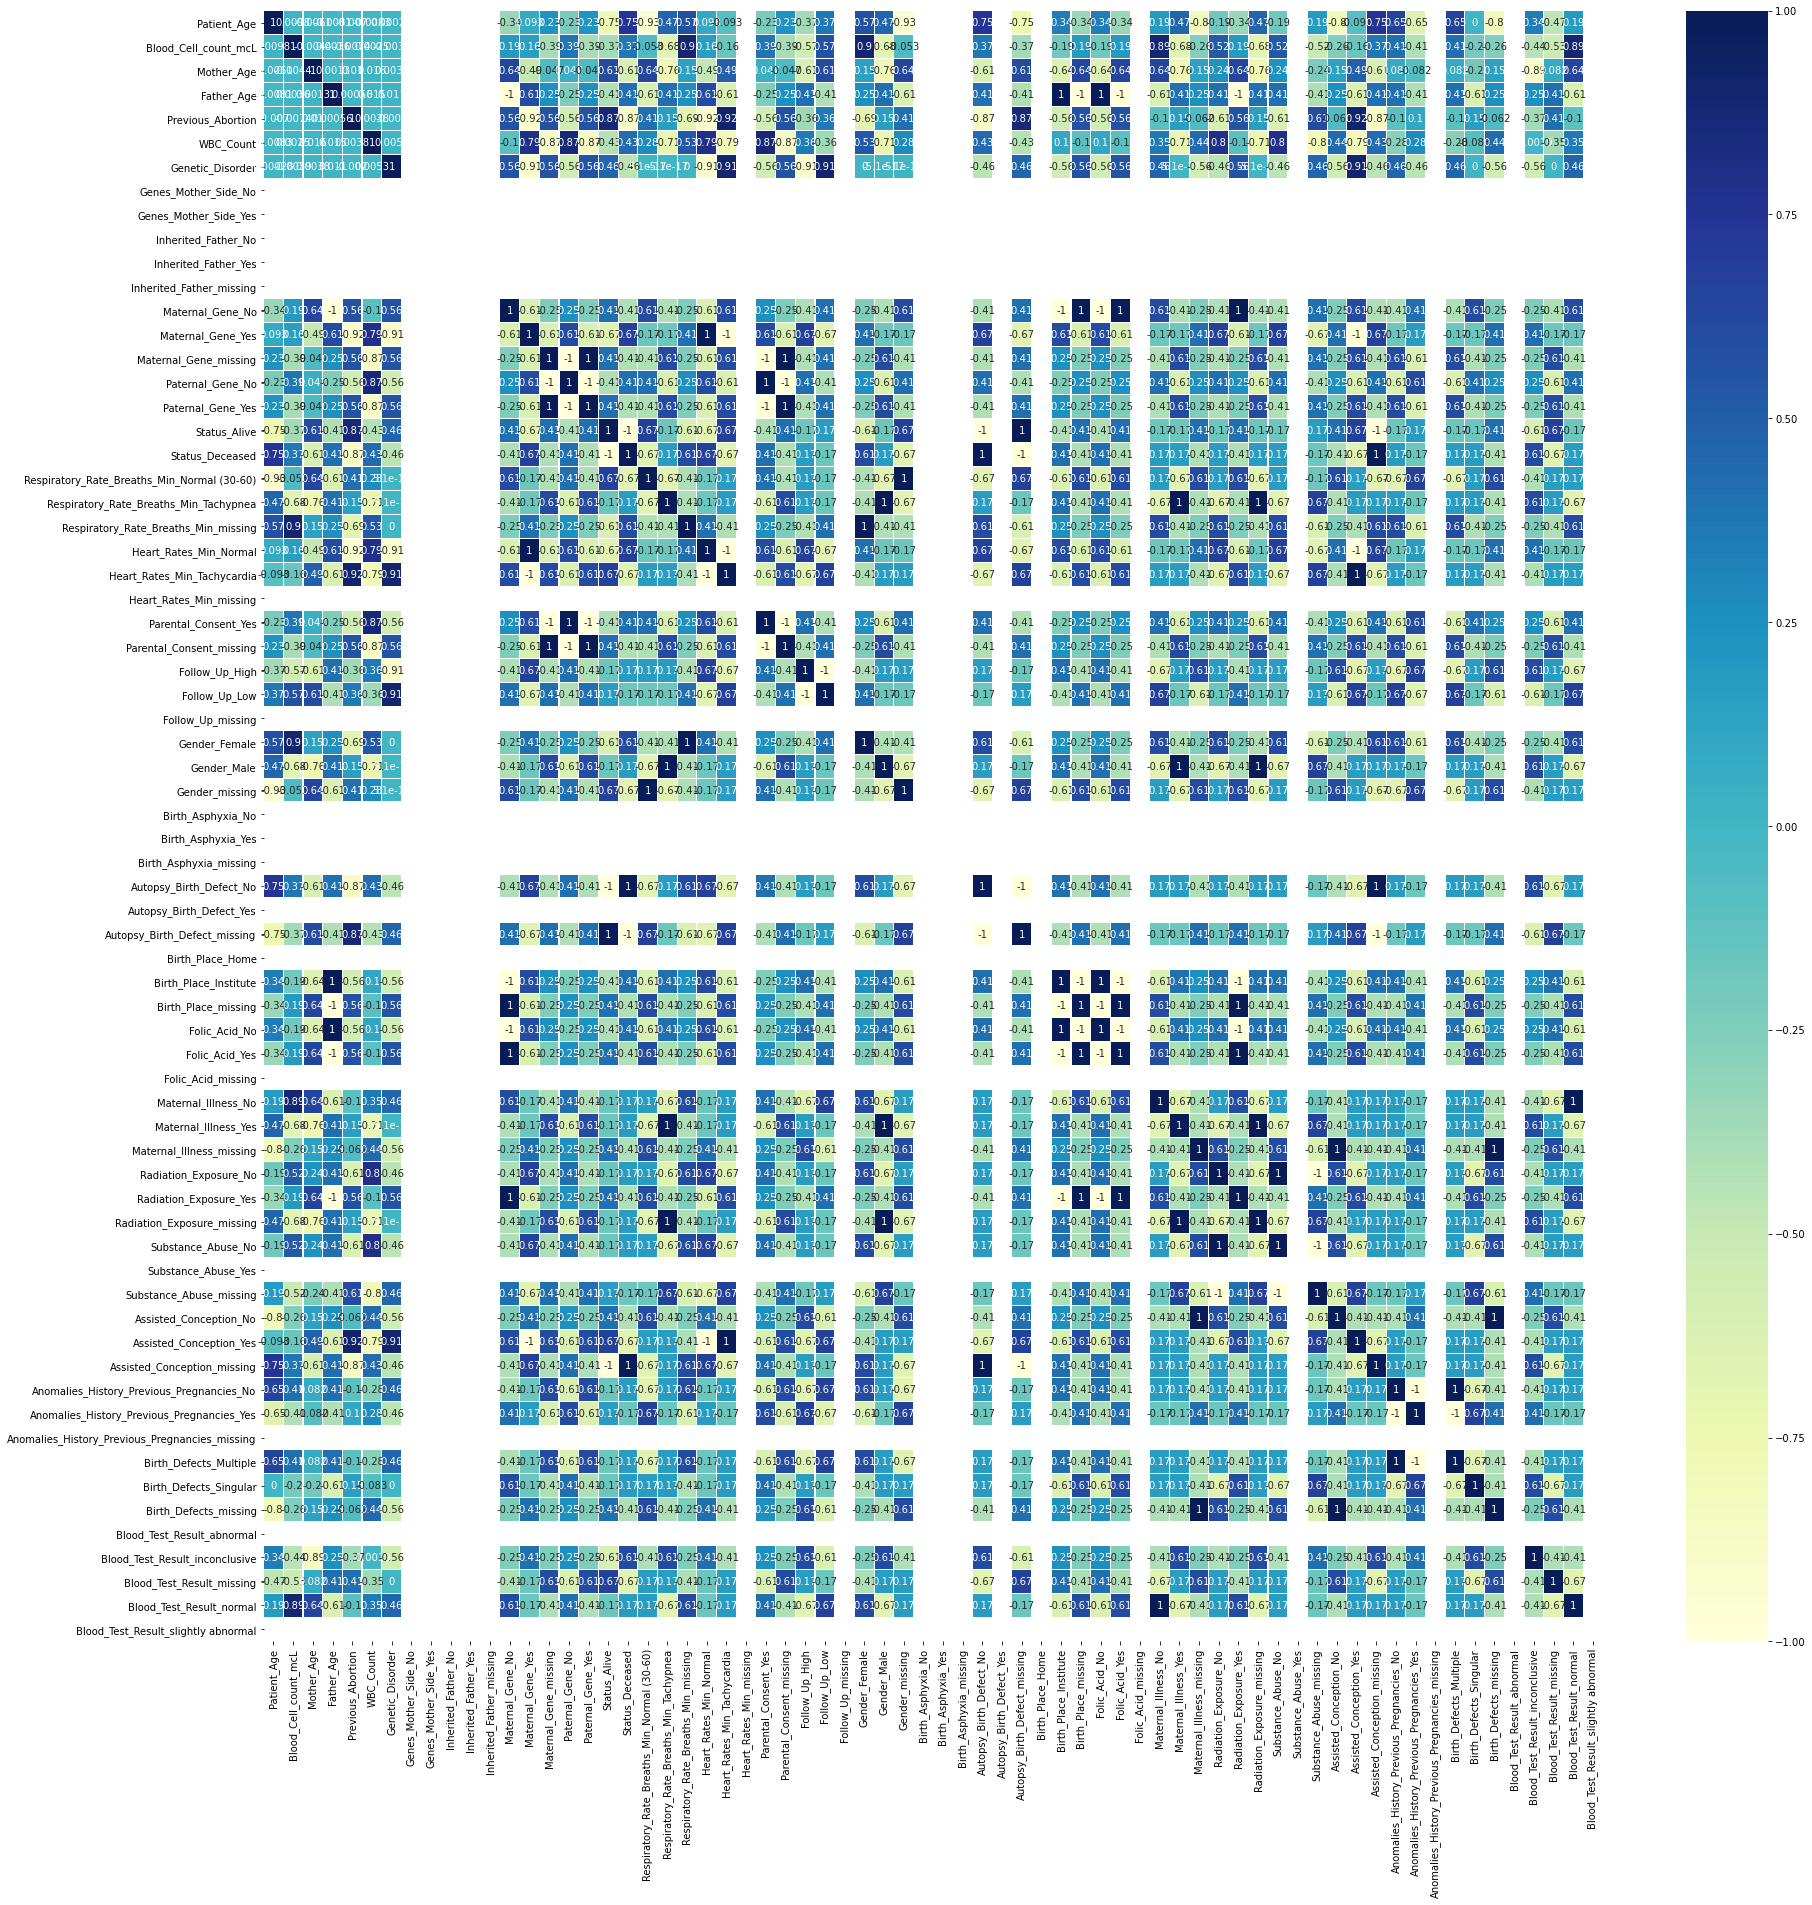

In [50]:
### create the correlation matrix heat map
plt.figure(figsize=(30,30))
sns.heatmap(genetic_data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [51]:
genetic_data.describe()

,Patient_Age,Blood_Cell_count_mcL,Mother_Age,Father_Age,Previous_Abortion,WBC_Count,Genetic_Disorder,Genes_Mother_Side_No,Genes_Mother_Side_Yes,Inherited_Father_No,...,Anomalies_History_Previous_Pregnancies_Yes,Anomalies_History_Previous_Pregnancies_missing,Birth_Defects_Multiple,Birth_Defects_Singular,Birth_Defects_missing,Blood_Test_Result_abnormal,Blood_Test_Result_inconclusive,Blood_Test_Result_missing,Blood_Test_Result_normal,Blood_Test_Result_slightly abnormal
count,18047.000000,18047.000000,18047.000000,18047.000000,18047.000000,18047.000000,18047.000000,5.0,5.0,5.0,...,5.000000,5.0,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.0
mean,6.950030,4.899198,34.564981,41.971932,1.999501,7.477010,1.591954,0.0,1.0,1.0,...,0.600000,0.0,0.400000,0.400000,0.200000,0.0,0.200000,0.400000,0.400000,0.0
std,4.185769,0.199061,8.524106,11.353151,1.347744,2.530330,0.670509,0.0,0.0,0.0,...,0.547723,0.0,0.547723,0.547723,0.447214,0.0,0.447214,0.547723,0.547723,0.0
min,0.000000,4.146230,18.000000,20.000000,0.000000,3.000000,1.000000,0.0,1.0,1.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,3.000000,4.764199,29.000000,34.000000,1.000000,5.628244,1.000000,0.0,1.0,1.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,6.970000,4.900306,34.530000,41.970000,2.000000,7.490000,1.000000,0.0,1.0,1.0,...,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,10.000000,5.033654,40.000000,50.000000,3.000000,9.286786,2.000000,0.0,1.0,1.0,...,1.000000,0.0,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.0
max,14.000000,5.609829,51.000000,64.000000,4.000000,12.000000,3.000000,0.0,1.0,1.0,...,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [52]:
genetic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 0 to 18046
Data columns (total 89 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Patient_Age                                     18047 non-null  float64
 1   Genes_Mother_Side                               18047 non-null  object 
 2   Inherited_Father                                18047 non-null  object 
 3   Maternal_Gene                                   18047 non-null  object 
 4   Paternal_Gene                                   18047 non-null  object 
 5   Blood_Cell_count_mcL                            18047 non-null  float64
 6   Mother_Age                                      18047 non-null  float64
 7   Father_Age                                      18047 non-null  float64
 8   Status                                          18047 non-null  object 
 9   Respiratory_Rate_Breaths_Min           

Data is now ready to feed into model

Split the data into X and y

In [53]:
X = genetic_data.drop('Genetic_Disorder', axis=1)

In [54]:
X.head()

,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_count_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Anomalies_History_Previous_Pregnancies_Yes,Anomalies_History_Previous_Pregnancies_missing,Birth_Defects_Multiple,Birth_Defects_Singular,Birth_Defects_missing,Blood_Test_Result_abnormal,Blood_Test_Result_inconclusive,Blood_Test_Result_missing,Blood_Test_Result_normal,Blood_Test_Result_slightly abnormal
0,2.0,Yes,No,Yes,No,4.760603,34.53,41.97,Alive,Normal (30-60),...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,6.0,Yes,No,No,No,4.893297,41.00,22.00,Alive,Normal (30-60),...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12.0,Yes,No,Yes,No,4.705280,21.00,41.97,Deceased,Tachypnea,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,11.0,Yes,No,missing,Yes,4.720703,32.00,41.97,Alive,Tachypnea,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,14.0,Yes,No,Yes,No,5.103188,34.53,41.97,Deceased,missing,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
y=genetic_data['Genetic_Disorder']

In [56]:
y.head()

0    1
1    3
2    1
3    3
4    2
Name: Genetic_Disorder, dtype: int32

In [57]:
y.value_counts()

1    9241
2    6929
3    1877
Name: Genetic_Disorder, dtype: int64

In [58]:
X.isna().sum()

Patient_Age                                0
Genes_Mother_Side                          0
Inherited_Father                           0
Maternal_Gene                              0
Paternal_Gene                              0
                                       ...  
Blood_Test_Result_abnormal             18042
Blood_Test_Result_inconclusive         18042
Blood_Test_Result_missing              18042
Blood_Test_Result_normal               18042
Blood_Test_Result_slightly abnormal    18042
Length: 88, dtype: int64

In [59]:
X.fillna(X.mean(), inplace=True)

<ipython-input-59-a786b3e72875>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


In [60]:
X.isna().sum()

Patient_Age                            0
Genes_Mother_Side                      0
Inherited_Father                       0
Maternal_Gene                          0
Paternal_Gene                          0
                                      ..
Blood_Test_Result_abnormal             0
Blood_Test_Result_inconclusive         0
Blood_Test_Result_missing              0
Blood_Test_Result_normal               0
Blood_Test_Result_slightly abnormal    0
Length: 88, dtype: int64

In [61]:
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Leigh syndrome', value='1')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Mitochondrial myopathy', value='2')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Cystic fibrosis', value='3')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Tay-Sachs', value='4')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Diabetes', value='5')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Hemochromatosis', value='6')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = "Leber's hereditary optic neuropathy", value='7')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = "Alzheimer's", value='8')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Cancer', value='9')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].astype(int)
#df["Disorder_Subclass"].unique()
#df["Genetic_Disorder"].isna().sum()

Feature Selection

In [62]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth=10 )
clf.fit(X,y)

ValueError: could not convert string to float: 'Yes'

In [ ]:
fi_col = []
fi = []
for i, column in enumerate(X):
    print('feature importance for {} is : {}'. format(column, clf.feature_importances_[i]))
    fi_col.append(column)
    fi.append( clf.feature_importances_[i])

In [ ]:
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['feature', 'feature_imp'])
fi_df


In [ ]:
fi_df.sort_values('feature_imp',ascending=False).reset_index()

In [ ]:
fi_df

Creating Columns to keep 

In [ ]:
new_df = fi_df[fi_df['feature_imp'] > 0]

In [ ]:
new_df

In [ ]:
cols_to_keep = new_df['feature']

In [ ]:
X.shape

In [ ]:
X = X[cols_to_keep]

In [ ]:
X.shape

In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.shape, y_test.shape

In [ ]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)